## Consigna 1er Parcial Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Agosto 2024.

# Ejercicio: Simulación de Particulas en un pozo de potencial  2D

En este ejercicio, simularemos un sistema de partículas en dos dimensiones utilizando el método de Monte Carlo y por qué no Euler también. Nuestro objetivo es observar la distribución de posiciones y velocidades de las partículas en un pozo de potencial y calcular sus propiedades energéticas. 

## Objetivo

1. **Generar un conjunto de partículas en 2D**: Inicialmente, las partículas tienen posiciones y velocidades aleatorias.
2. **Simular el comportamiento de las partículas en equilibrio térmico**: Actualizar las posiciones y velocidades de las partículas durante la simulación.
3. **Calcular propiedades energéticas**: Determinar la energía cinética y potencial del sistema.
4. **Visualizar los resultados**: Mostrar la distribución de posiciones y velocidades de las partículas.

## Descripción del Sistema

1. **Posiciones**: Inicialmente las partículas están distribuidas aleatoriamente dentro de una pozo de potencial bidimensional.
2. **Velocidades**: Las velocidades de las partículas siguen una distribución normal y están escaladas por la temperatura del sistema para simular equilibrio térmico.

## Pasos del Ejercicio

1. **Inicialización**:
   - En el contexto de simulaciones de dinámica molecular y física computacional, la temperatura se usa a menudo en términos de $k_b T$, donde
$k_b$ es la constante de Boltzmann $1.38x10^{23} \frac{J}{K}$ y $T$ es la temperatura en kelvins.<br>
Para simplificar los calculos, usaremos $kt = 1.0$, Para simulaciones más precisas y completas, especialmente en aplicaciones reales, es necesario considerar las constantes físicas adecuadas y las unidades. Podés tambien probar cambiando este valor.
   - Para implementar Euler y poder obtener la velocidad en cada iteración, hemos de calcular la aceleración en función a las fuerzas. Nuevamente por simplicidad, vamos a asumir una masa $m =1$, y asi simplificaremos el cálculo de la aceleración ya que será equivalente a la fuerza.
   - Generar $n$ partículas con posiciones aleatorias en un rango de [-1, 1] en ambas direcciones $(x, y)$, es decir, create dos vectores  de $n$ partículas con las coordenadas aleatoreas $x$ e $y$, representaran la distancia al centro del pozo de potencial.
   - Asignar a cada partícula una velocidad inicial aleatoria, multiplicada por la raíz cuadrada de la temperatura, es decir, nuevamente dos vectores con las velocidades en $x$ e $y$ para $n$ partículas


2. **Potencial**:
   - En el ejercico que estamos queriendo resolver, suponemos partículas en un pozo de potencial simplificadísimo. Dependiendo del tipo de pozo, el potencial varía. Para nuestro ejercicio el nuestro será un potencial cuadrático que se suele utilizar para sistemas en equilibrio térmico.<br>
   El potencial en cuestión es $U(r_i) = \frac{1}{2}k r^2$ donde $r_i$ es el vector posición de la partícula $i$ respecto al centro, y $k$ la constante que define la 'rigidez' o fuerza de un resorte en el modelo de hooke. 
   - Por otro lado, sabemos que la fuerza es la derivada del potencial respecto a la posición. $F_i = -k r_i$
   - Si simplificamos (si, de nuevo) y asumimos $k = 1$, el potencial se reduce a $U = \frac{1}{2}r_{i}^2$ y la fuerza termina siendo $F = - r_i$, si te animás, probá con algún otro k para ver como se comporta tu sistema.

3. **Simulación**:
   - Creá una función fuerza, a la cual le vas a pasar por parámetro la posición en una coordenada dada, y la constante $k$. Vas a usarlo para calcular la fuerza en $x$ y en $y$ en cada iteracion
   - Para cada paso de simulación tenés que:
     - Actualizar las posiciones del vector de partículas en función de sus velocidades actuales.
     - Con las posiciones actualizadas, obtener la aceleración (fuerza).
     - Actualizar las velocidades de las partículas en función a la aceleración.

4. **Cálculo de Energías**:
   - **Energía Cinética**: Calculada como $( K = \frac{1}{2} m v^2  = \frac{1}{2} m (v_x^2 + v_y^2) )$, donde $( v )$ es la velocidad de cada partícula. Sumá la energía de todas las partículas para obtener la energía cinética total. 
   - **Energía Potencial**: Calculada como $( U = \frac{1}{2} k r^2 = \frac{1}{2} k (x^2 + y^2) )$, donde $( x )$ es la posición de cada partícula en la caja.. Sumá la energía de todas las partículas para obtener la energía potencial total. P
   - Para sumar todos los componentes de un vector numpy podes utilizar la funcion np.sum(vector_x)

5. **Visualización**:
   - Graficar las posiciones iniciales y finales de las partículas en la caja. No es necesario grafiques el paso a paso.
   - Mostrar la distribución de las componentes de velocidad en los ejes x e y. Para ello podés recurrir a un histograma.

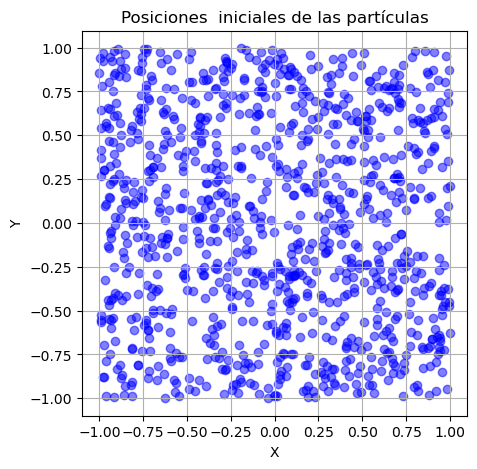

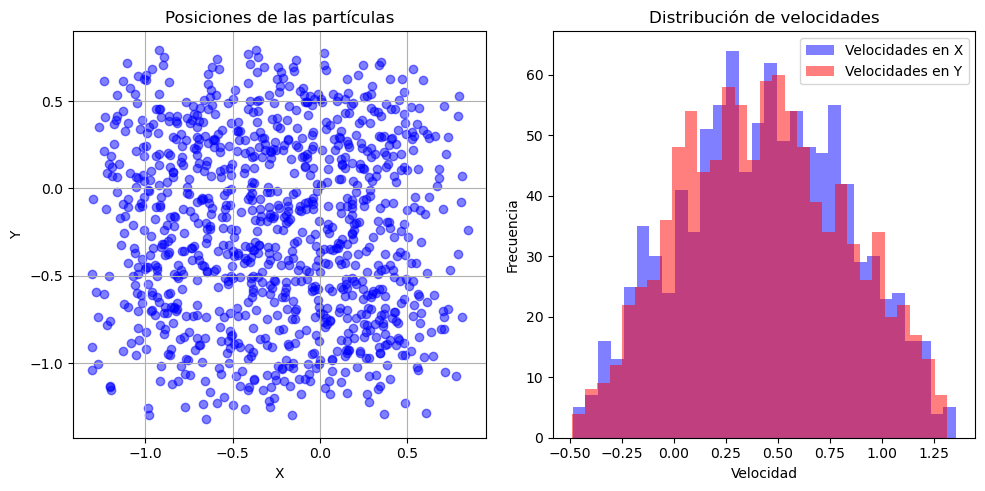

Energía cinética: K = 339.2096
Energía potencial: U = 333.3921
Energía total: E = 672.6017


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = 1000  # Número de partículas
num_pasos = 10000     # Número de pasos de simulación
temperatura = 1.0     # Temperatura en términos de kT

# Inicialización
posiciones_x = np.random.random(n)  * 2 - 1# Posiciones X aleatorias
posiciones_y = np.random.random(n)  * 2 -1# Posiciones Y aleatorias
velocidades_x = np.random.random(n) * np.sqrt(temperatura)  # Velocidades X aleatorias
velocidades_y = np.random.random(n) * np.sqrt(temperatura)  # Velocidades Y aleatorias

################        Posicion inicial        ##########################
plt.figure(figsize=(5, 5))

# Posiciones
plt.scatter(posiciones_x, posiciones_y, alpha=0.5, color='blue')
plt.title("Posiciones  iniciales de las partículas")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Parámetros de la simulación
dt = 0.01  # Paso de tiempo
k = 1.0 #constante de potencial

###################         Fuerza              ##########################

def fuerza(k,x,y):
    fuerza_x = -k * x
    fuerza_y = -k * y
    return fuerza_x ,fuerza_y

###################     Simulación  dinámica      ########################

for i in range(num_pasos):
    # Actualización de posiciones
    posiciones_x += velocidades_x * dt
    posiciones_y += velocidades_y * dt
    
    # Obtenemos la aceleración, como la masa es 1, será la fuerza
    fuerza_x ,fuerza_y = fuerza(k,posiciones_x,posiciones_y)
    
    # Actualización de velocidades
    velocidades_x += fuerza_x * dt
    velocidades_y += fuerza_y * dt


###################     Ploteos     ########################
# Visualización de las posiciones de las partículas
plt.figure(figsize=(10, 5))

# Posiciones
plt.subplot(1, 2, 1)
plt.scatter(posiciones_x, posiciones_y, alpha=0.5, color='blue')
plt.title("Posiciones de las partículas")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Distribución de velocidades
plt.subplot(1, 2, 2)
plt.hist(velocidades_x, bins=30, alpha=0.5, color='blue', label='Velocidades en X')
plt.hist(velocidades_y, bins=30, alpha=0.5, color='red', label='Velocidades en Y')
plt.title("Distribución de velocidades")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()



###################     Resultados     ########################

# Calcular la energía cinética y potencial
energia_cinetica = 0.5 * (np.sum(velocidades_x**2) + np.sum(velocidades_y**2))
energia_potencial = 0.5 * (np.sum(posiciones_x**2) + np.sum(posiciones_y**2))
energia_total = energia_cinetica + energia_potencial

print(f"Energía cinética: K = {energia_cinetica:.4f}")
print(f"Energía potencial: U = {energia_potencial:.4f}")
print(f"Energía total: E = {energia_total:.4f}")